In [115]:
import sys
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [122]:
df = pd.read_csv('penguins.csv')
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
0,Adelie,39.1,18.7,181,male,3750
1,Adelie,39.5,17.4,186,female,3800
2,Adelie,40.3,18.0,195,female,3250
3,Adelie,39.6,17.7,186,female,3500
4,Adelie,36.7,19.3,193,female,3450


In [123]:
labelencoder=LabelEncoder()
df['gender'] = labelencoder.fit_transform(df['gender'])

In [130]:
data = df.drop(columns="species")
scaler = preprocessing.MinMaxScaler()
names = data.columns
d = scaler.fit_transform(data)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df["species"]=df["species"]
scaled_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g,species
0,0.196078,0.666667,0.155172,0.5,0.291667,Adelie
1,0.211765,0.511905,0.241379,0.0,0.305556,Adelie
2,0.243137,0.583333,0.396552,0.0,0.152778,Adelie
3,0.215686,0.547619,0.241379,0.0,0.222222,Adelie
4,0.101961,0.738095,0.362069,0.0,0.208333,Adelie


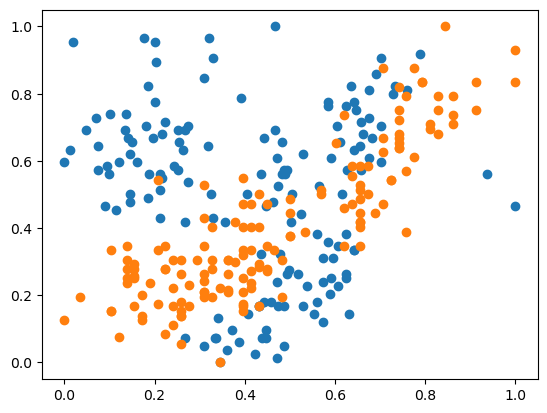

In [131]:
plt.scatter(scaled_df.bill_length_mm,scaled_df.bill_depth_mm)
plt.scatter(scaled_df.flipper_length_mm,scaled_df.body_mass_g)
plt.show()

In [11]:
shuffel =df.sample(frac=1)

In [138]:
First =scaled_df.iloc[:50]
Second=scaled_df.iloc[50:100]
Third = scaled_df.iloc[100:]

C1_x = First.drop(columns="species")
C1_y=First.species
X_train1, X_test1, y_train1, y_test1 = train_test_split(C1_x, C1_y, test_size = 0.40,  shuffle= True ,random_state= 1 )
C2_x = Second.drop(columns="species")
C2_y=Second.species
X_train2, X_test2, y_train2, y_test2 = train_test_split(C2_x, C2_y, test_size = 0.40,  shuffle= True ,random_state= 1 )
C3_x = Third.drop(columns="species")
C3_y=Third.species
X_train3, X_test3, y_train3, y_test3 = train_test_split(C3_x, C3_y, test_size = 0.40,  shuffle= True ,random_state= 1 )


,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g,species
0,0.196078,0.666667,0.155172,0.5,0.291667,Adelie
1,0.211765,0.511905,0.241379,0.0,0.305556,Adelie
2,0.243137,0.583333,0.396552,0.0,0.152778,Adelie
3,0.215686,0.547619,0.241379,0.0,0.222222,Adelie
4,0.101961,0.738095,0.362069,0.0,0.208333,Adelie
5,0.203922,0.892857,0.310345,0.5,0.263889,Adelie
6,0.188235,0.559524,0.155172,0.0,0.256944,Adelie
7,0.200000,0.773810,0.396552,0.5,0.548611,Adelie
8,0.000000,0.595238,0.362069,1.0,0.215278,Adelie
9,0.309804,0.845238,0.310345,1.0,0.430556,Adelie


In [75]:
c = 0
def signum(V):
    if V>=0: c = 1 

In [133]:
import random
W = [random.random(),random.random()]
W

[0.2925082911955559, 0.8308513920698323]

In [134]:
def Model(eboch,x,b,eta,y):
    for i in range(eboch):
        for z in range(x.shape[0]):
            actual = y[z]
            instance= x[z]
            x0=instance[0]
            x1=instance[1]
            sum = w[0]*x0 + w[1]*x1 +b
            if sum>=1:
                predict = 1
            else :
                predict = 0
            if predict != actual:
                Loss =  actual - predict 
                W[0] =W[0]+eta*Loss*x0
                W[1] =W[1]+eta*Loss*x1

            

In [135]:
x = X_train3.drop(columns =["flipper_length_mm","gender","body_mass_g"])


In [136]:
Model(10,x,0,0.3,y_train3)

KeyError: 0